In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name='weight')
b = tf.Variable(rng.randn(), name='bias')

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2)) / (2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.079843268 W= 0.279654 b= 0.585216


Epoch: 0100 cost= 0.079511523 W= 0.277866 b= 0.598078


Epoch: 0150 cost= 0.079218216 W= 0.276184 b= 0.610176


Epoch: 0200 cost= 0.078958906 W= 0.274603 b= 0.621553


Epoch: 0250 cost= 0.078729697 W= 0.273115 b= 0.632252


Epoch: 0300 cost= 0.078527078 W= 0.271717 b= 0.642315


Epoch: 0350 cost= 0.078347929 W= 0.270401 b= 0.651779


Epoch: 0400 cost= 0.078189582 W= 0.269164 b= 0.660681


Epoch: 0450 cost= 0.078049600 W= 0.268 b= 0.669053


Epoch: 0500 cost= 0.077925876 W= 0.266905 b= 0.676928


Epoch: 0550 cost= 0.077816486 W= 0.265876 b= 0.684335


Epoch: 0600 cost= 0.077719845 W= 0.264907 b= 0.691301


Epoch: 0650 cost= 0.077634424 W= 0.263996 b= 0.697853


Epoch: 0700 cost= 0.077558935 W= 0.26314 b= 0.704016


Epoch: 0750 cost= 0.077492230 W= 0.262334 b= 0.709812


Epoch: 0800 cost= 0.077433288 W= 0.261576 b= 0.715264


Epoch: 0850 cost= 0.077381209 W= 0.260863 b= 0.720392


Epoch: 0900 cost= 0.077335186 W= 0.260193 b= 0.725214


Epoch: 0950 cost= 0.077294573 W= 0.259563 b= 0.729749


Epoch: 1000 cost= 0.077258661 W= 0.25897 b= 0.734015
Optimization Finished!
Training cost= 0.0772587 W= 0.25897 b= 0.734015 



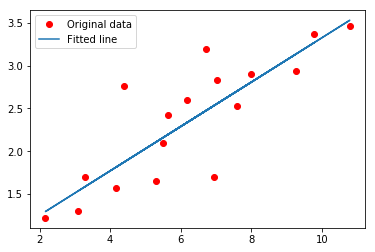

In [8]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    
    # fit all training data
    for epoch in range(training_epochs):
        for (x, y) in  zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print("Epoch:", "%04d" % (epoch+1), "cost=", "{:.9f}".format(c), \
                  "W=", sess.run(W), 'b=', sess.run(b))
    
    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    
    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W)*train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()